In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [4]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)


C:\Users\sehri\AppData\Local\Temp\ipykernel_2384\1306612403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\sehri\AppData\Local\Temp\ipykernel_2384\1306612403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [6]:
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
X = data.drop('Survived', axis=1)
y = data['Survived']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)







c:\Users\sehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [11]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [14]:
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression
Accuracy: 0.7988826815642458
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [16]:
y_pred_dt = dt_classifier.predict(X_test)
print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.7206703910614525
[[79 26]
 [24 50]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       105
           1       0.66      0.68      0.67        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



In [17]:
y_pred_rf = rf_classifier.predict(X_test)
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.8212290502793296
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [18]:
y_pred_svm = svm_classifier.predict(X_test)
print("\nSupport Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.5977653631284916
[[103   2]
 [ 70   4]]
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179



In [19]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

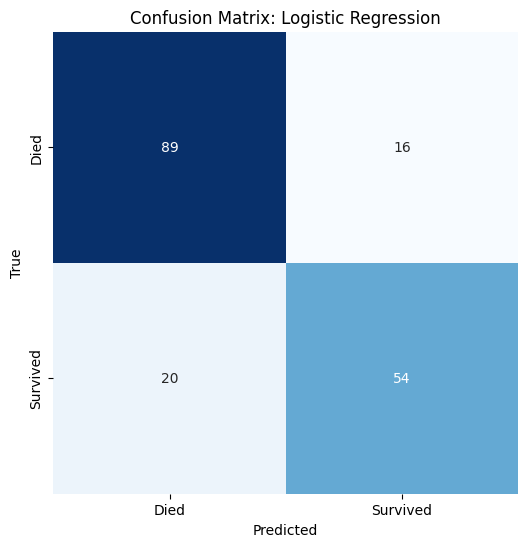

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), "Logistic Regression")

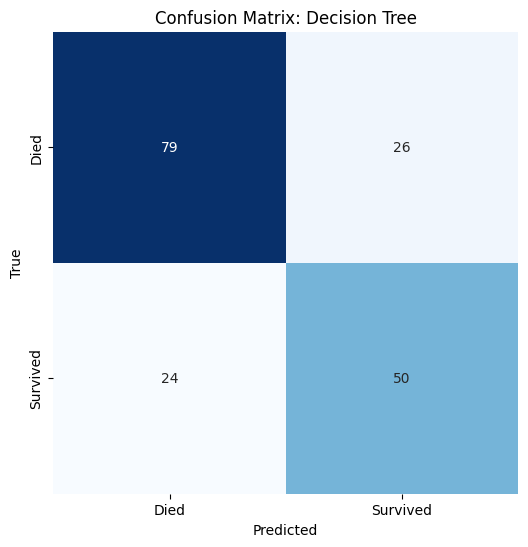

In [22]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), "Decision Tree")

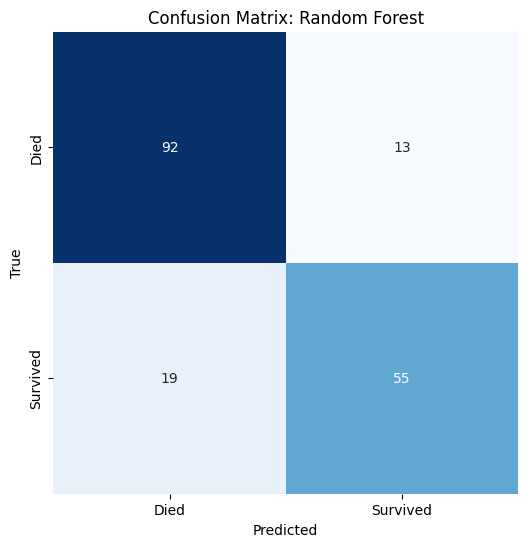

In [23]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Random Forest")

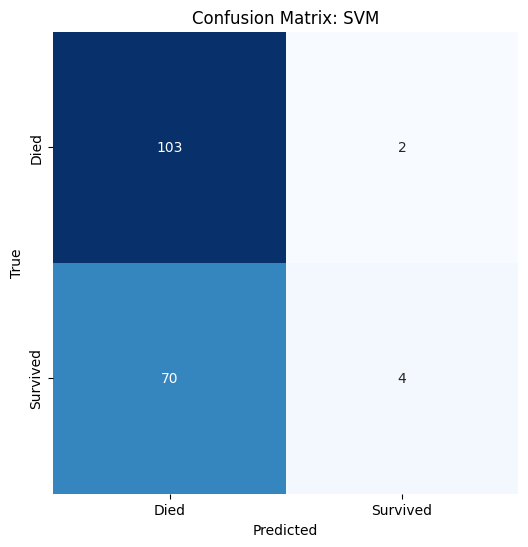

In [24]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), "SVM")